Winning prediction from bettings odds of all 4 companies and team attributes

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv(r'C:\Users\KL\Downloads\archive\/matches_with_team_attributes.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15981 entries, 0 to 15980
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_match                  15981 non-null  int64  
 1   date_match                15981 non-null  object 
 2   season_name               15981 non-null  object 
 3   home_team_api_id          15981 non-null  int64  
 4   away_team_api_id          15981 non-null  int64  
 5   win_lose_draw             15981 non-null  object 
 6   B365H                     15981 non-null  float64
 7   B365D                     15981 non-null  float64
 8   B365A                     15981 non-null  float64
 9   BWH                       15981 non-null  float64
 10  BWD                       15981 non-null  float64
 11  BWA                       15981 non-null  float64
 12  IWH                       15981 non-null  float64
 13  IWD                       15981 non-null  float64
 14  IWA   

In [7]:
#Prepare data and try different shallow models
feature_cols = list(
    set(df.columns.tolist()) - 
    {'id', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'win_lose_draw', 'season_name', 'date_match', 'id_match'}
    )
target_label = 'win_lose_draw'

X = df[feature_cols]
y = df[target_label]

print(feature_cols)

['chanceCreationPassing_H', 'chanceCreationCrossing_A', 'BWD', 'buildUpPlayPassing_H', 'buildUpPlaySpeed_A', 'defencePressure_A', 'chanceCreationShooting_H', 'LBH', 'buildUpPlayPassing_A', 'LBD', 'IWD', 'LBA', 'defenceTeamWidth_A', 'B365H', 'chanceCreationCrossing_H', 'B365D', 'B365A', 'BWH', 'defenceTeamWidth_H', 'IWH', 'defenceAggression_A', 'buildUpPlaySpeed_H', 'defenceAggression_H', 'chanceCreationPassing_A', 'BWA', 'defencePressure_H', 'IWA', 'chanceCreationShooting_A']


<AxesSubplot:>

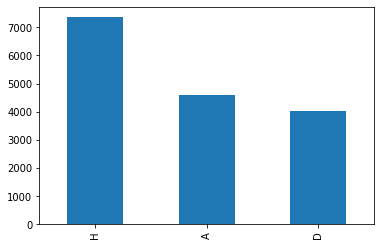

In [13]:
y.value_counts().plot(kind='bar')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.53
Accuracy of Logistic regression classifier on test set: 0.54


In [23]:
#A shot at 10 fold cross validation
from numpy import mean, std
from sklearn.model_selection import KFold, cross_val_score

scores = cross_val_score(LogisticRegression(), X, y, cv=KFold(n_splits=10, random_state=42, shuffle=True))

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

c:\Users\KL\Envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\KL\Envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.533 (0.014)


c:\Users\KL\Envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.42


In [25]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=KFold(n_splits=10, random_state=42, shuffle=True))
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.423 (0.013)


In [26]:
#K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.68
Accuracy of K-NN classifier on test set: 0.45


In [27]:
scores = cross_val_score(KNeighborsClassifier(), X, y, cv=KFold(n_splits=10, random_state=42, shuffle=True))
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.426 (0.014)


In [28]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.53
Accuracy of LDA classifier on test set: 0.54


In [29]:
scores = cross_val_score(LinearDiscriminantAnalysis(), X, y, cv=KFold(n_splits=10, random_state=42, shuffle=True))
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.529 (0.014)


In [30]:
#Gaußian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.42
Accuracy of GNB classifier on test set: 0.42


In [31]:
scores = cross_val_score(GaussianNB(), X, y, cv=KFold(n_splits=10, random_state=42, shuffle=True))
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.418 (0.010)


In [32]:
#Support Vector Machine
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.52
Accuracy of SVM classifier on test set: 0.53


In [33]:
scores = cross_val_score(SVC(), X, y, cv=KFold(n_splits=10, random_state=42, shuffle=True))
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

KeyboardInterrupt: 

In [ ]:
# Multi-layer perceptron
# Linear MLP, single hidden layer

In [35]:
# One layer of 1 neuron
from sklearn.neural_network import MLPClassifier

plot = MLPClassifier(random_state=42, activation='identity', hidden_layer_sizes=(1,))
plot.fit(X_train, y_train)

print('Accuracy of MLP classifier on training set: {:.2f}'
     .format(plot.score(X_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.2f}'
     .format(plot.score(X_test, y_test)))

Accuracy of MLP classifier on training set: 0.53
Accuracy of MLP classifier on test set: 0.54


In [37]:
scores = cross_val_score(plot, X, y, cv=KFold(n_splits=10, random_state=42, shuffle=True))
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.532 (0.015)


In [38]:
#One layer of 10 neurons
mlp = MLPClassifier(random_state=42, activation='identity', hidden_layer_sizes=(10,))
mlp.fit(X_train, y_train)

print('Accuracy of MLP classifier on training set: {:.2f}'
     .format(mlp.score(X_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.2f}'
     .format(mlp.score(X_test, y_test)))

Accuracy of MLP classifier on training set: 0.53
Accuracy of MLP classifier on test set: 0.54


In [39]:
scores = cross_val_score(mlp, X, y, cv=KFold(n_splits=10, random_state=42, shuffle=True))
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.524 (0.018)


In [40]:
#Linear MLP, two hidden layers
mlp = MLPClassifier(random_state=42, activation='identity', hidden_layer_sizes=(1,1))
mlp.fit(X_train, y_train)

print('Accuracy of MLP classifier on training set: {:.2f}'
     .format(mlp.score(X_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.2f}'
     .format(mlp.score(X_test, y_test)))

Accuracy of MLP classifier on training set: 0.53
Accuracy of MLP classifier on test set: 0.54


In [41]:
scores = cross_val_score(mlp, X, y, cv=KFold(n_splits=10, random_state=42, shuffle=True))
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.531 (0.015)


In [42]:
mlp = MLPClassifier(random_state=42, activation='identity', hidden_layer_sizes=(10,10))
mlp.fit(X_train, y_train)

print('Accuracy of MLP classifier on training set: {:.2f}'
     .format(mlp.score(X_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.2f}'
     .format(mlp.score(X_test, y_test)))

Accuracy of MLP classifier on training set: 0.53
Accuracy of MLP classifier on test set: 0.54


In [43]:
mlp = MLPClassifier(random_state=42, activation='relu', hidden_layer_sizes=(100,100))
mlp.fit(X_train, y_train)

print('Accuracy of MLP classifier on training set: {:.2f}'
     .format(mlp.score(X_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.2f}'
     .format(mlp.score(X_test, y_test)))

Accuracy of MLP classifier on training set: 0.84
Accuracy of MLP classifier on test set: 0.43


c:\Users\KL\Envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
#Non-linear MLP, three hidden layers and more
mlp = MLPClassifier(random_state=42, activation='relu', hidden_layer_sizes=(10, 10, 10))
mlp.fit(X_train, y_train)

print('Accuracy of MLP classifier on training set: {:.2f}'
     .format(mlp.score(X_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.2f}'
     .format(mlp.score(X_test, y_test)))

Accuracy of MLP classifier on training set: 0.55
Accuracy of MLP classifier on test set: 0.52


c:\Users\KL\Envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
mlp = MLPClassifier(random_state=42, activation='relu', hidden_layer_sizes=(10, 10, 10, 10, 10))
mlp.fit(X_train, y_train)

print('Accuracy of MLP classifier on training set: {:.2f}'
     .format(mlp.score(X_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.2f}'
     .format(mlp.score(X_test, y_test)))

Accuracy of MLP classifier on training set: 0.55
Accuracy of MLP classifier on test set: 0.51


c:\Users\KL\Envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
mlp = MLPClassifier(random_state=42, activation='relu', hidden_layer_sizes=(100, 100, 100, 100, 100))
mlp.fit(X_train, y_train)

print('Accuracy of MLP classifier on training set: {:.2f}'
     .format(mlp.score(X_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.2f}'
     .format(mlp.score(X_test, y_test)))

Accuracy of MLP classifier on training set: 0.98
Accuracy of MLP classifier on test set: 0.45


Confusion matrix of Logistic Regression
Logistic Regression was the best performing simplest model.

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

pred = logreg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 429    5  502]
 [ 182    1  608]
 [ 170    0 1300]]
              precision    recall  f1-score   support

           A       0.55      0.46      0.50       936
           D       0.17      0.00      0.00       791
           H       0.54      0.88      0.67      1470

    accuracy                           0.54      3197
   macro avg       0.42      0.45      0.39      3197
weighted avg       0.45      0.54      0.46      3197

